In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [52]:
def gradient_descent(data_train, data_valid, lr=0.1, ep=0.001, max_iter=10000):
  X_train, y_train = data_train
  X_valid, y_valid = data_valid

  converged = False
  count_iter = 0

  w0 = np.random.rand(1)
  w1 = np.random.rand(1)

  N_train = len(y_train)
  N_valid = len(y_valid)

  J_train = (1/(2*N_train))*sum([ (w0 + w1*X_train[i] - y_train[i])**2 for i in range(N_train)])
  J_valid = (1/(2*N_valid))*sum([ (w0 + w1*X_valid[i] - y_valid[i])**2 for i in range(N_valid)])

  cost_train = [J_train]
  cost_valid = [J_valid]

  while not converged:
    grad_w0 = (1/N_train)*sum([ (w0 + w1*X_train[i] - y_train[i])*1 for i in range(N_train)])
    grad_w1 = (1/N_train)*sum([ (w0 + w1*X_train[i] - y_train[i])*X_train[i] for i in range(N_train)])

    w0 = w0 - lr*grad_w0
    w1 = w1 - lr*grad_w1

    err_train = (1/(2*N_train))*sum([ (w0 + w1*X_train[i] - y_train[i])**2 for i in range(N_train)])
    cost_train.append(err_train[0])

    if abs(J_train-err_train)<ep:
      print(f"Converged successfully in iter: {count_iter}")
      converged = True
    
    if count_iter == max_iter:
      converged = True

    if count_iter % 500 == 0:
      err_valid = (1/(2*N_valid))*sum([ (w0 + w1*X_valid[i] - y_valid[i])**2 for i in range(N_valid)])
      #J_valid = err_valid
      cost_valid.append(err_valid[0])
      print(f"count_iter: {count_iter},  cost_train: {err_train} , cost_valid: {err_valid}")

    J_train = err_train
    count_iter += 1
  return w0, w1, cost_train, cost_valid

# Pre-procesamiento

In [3]:
df_train = pd.read_csv('train_function.csv')
df_train.head()

,X,y
0,93.0,2450.895813
1,81.0,1973.210485
2,20.0,438.338496
3,39.0,461.168504
4,202.0,7402.304030


In [31]:
X.shape, y.shape

((200,), (200,))

In [14]:
len(df_train.index)

200

In [26]:
#X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((160,), (160,), (40,), (40,))

In [135]:
data = df_train[['X','y']].to_numpy()
X, y = data[:,0], data[:,1]

#X = X**2
y = np.sqrt(y)

test_split = 0.8
N = len(df_train.index)
sz = int(test_split*N)
X_train, y_train = X[:sz], y[:sz]
X_valid, y_valid = X[sz:], y[sz:]

# y_train = np.sqrt(y_train) # No linearidad
# y_valid = np.sqrt(y_valid)



mean_X = np.mean(X_train)
std_X = np.std(X_train)

mean_y = np.mean(y_train)
std_y = np.std(y_train)

X_train = (X_train - mean_X)/std_X
y_train = (y_train - mean_y)/std_y

X_valid = (X_valid - mean_X)/std_X
y_valid = (y_valid - mean_y)/std_y

data_train = (X_train, y_train)
data_valid = (X_valid, y_valid)

w0, w1, c_train, c_valid = gradient_descent(data_train, data_valid, lr=0.1, ep=1e-8, max_iter=10000)

count_iter: 0,  cost_train: [0.06416777] , cost_valid: [0.03720997]
Converged successfully in iter: 68


In [110]:
# plt.plot(c_train)
# plt.show()
# plt.plot(c_valid)
# plt.show()

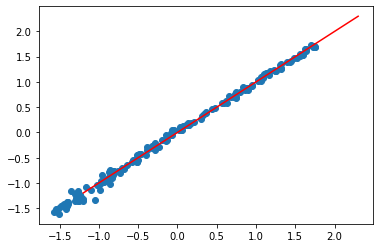

In [136]:
# plt.scatter(X_train, y_train)
# plt.plot(np.arange(-1.6,2,0.1), w0 +w1*np.arange(-1.6,2,0.1)**2, 'r')
# plt.show()

plt.scatter(X_train, y_train)
plt.plot(np.arange(-1.2,2.4,0.1), [(w0 + w1 * x)[0] for x in np.arange(-1.2,2.4,0.1)], 'r')
plt.show()

In [137]:
df_test = pd.read_csv('test_function.csv')
len(df_test.index)

40

In [138]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [139]:
data_test = df_test[['X','y']].to_numpy()

In [144]:
X_test, y_test = data_test[:,0], data_test[:,1]
#X_test = X_test**2
y_test = np.sqrt(y_test)

X_test = (X_test - mean_X)/std_X

y_pred = w0 + w1*X_test
y_pred = y_pred*std_y + mean_y
y_pred = y_pred**2  # sqrt

In [141]:
np.max(data_test[:,0])

238.0

In [142]:
data_test[:,0]

array([ 62., 163.,  94.,  56., 238., 102., 175.,  48., 150., 222.,  17.,
       209., 211., 166., 145., 116., 214.,  68., 226., 170.,  84., 234.,
        36., 176.,  53.,  85.,  29.,   2., 179., 103.,   9., 217., 117.,
       174., 161.,  93., 209.,  33.,  31.,  92.])

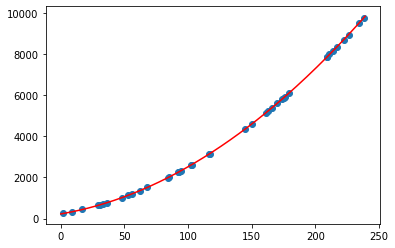

In [145]:
## USANDO SQRT(Y)
#plt.figure(figsize=(20,7))
plt.scatter(data_test[:,0], y_pred)
plt.plot(np.arange(0,240,1), [((w0 + w1*(x-mean_X)/std_X)[0]*std_y + mean_y)**2 for x in np.arange(0,240,1)], 'r')
#plt.plot(np.arange(0,240,1), [((w0 + w1*((x**2-mean_X)/std_X))[0]*std_y + mean_y) for x in np.arange(0,240,1)], 'r')
plt.show()

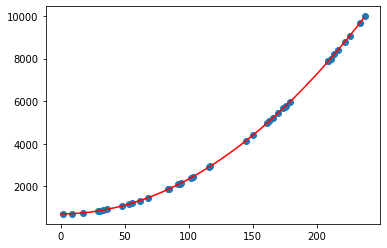

In [134]:
## USANDO X**2
plt.scatter(data_test[:,0], y_pred)
#plt.plot(np.arange(0,240,1), [((w0 + w1*(x**2-mean_X)/std_X)[0]*std_y + mean_y) for x in np.arange(0,240,1)], 'r')
plt.plot(np.arange(0,np.max(data_test[:,0])), (w0 + w1*(np.arange(0,np.max(data_test[:,0]))**2- mean_X)/std_X)*std_y + mean_y, 'r')
plt.show()

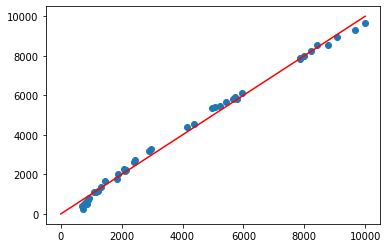

In [122]:
plt.scatter(y_pred, y_test)
plt.plot(np.arange(0,10000),np.arange(0,10000), 'r')
plt.show()

In [123]:
print(f"MAE: {mean_absolute_error(y_pred, y_test)}")

MAE: 184.39284762400243


In [124]:
print(f"RMSE: {np.sqrt(mean_squared_error(y_pred, y_test))}")

RMSE: 219.95002459444316


In [148]:
print(f"MAE: {mean_absolute_error(y_pred, data_test[:,1])}")

MAE: 81.35703887473014


In [149]:
print(f"RMSE: {np.sqrt(mean_squared_error(y_pred, data_test[:,1]))}")

RMSE: 101.48777269418149
